In [22]:
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# this is just to see how f2 metric behaves

In [24]:
f2_scorer = make_scorer(fbeta_score, beta=2)
f2_scorer


#http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
def tnr_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    tp = cm[1][1]*1.
    fn = cm[1][0]*1.
    tn = cm[0][0]*1.
    fp = cm[0][1]*1.
    tnr = tn/(tn+fp)
    return tnr



def fnr_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    tp = cm[1][1]*1.
    fn = cm[1][0]*1.
    tn = cm[0][0]*1.
    fp = cm[0][1]*1.
    fnr = fn/(tp+fn)
    return fnr

def fpr_score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    tp = cm[1][1]*1.
    fn = cm[1][0]*1.
    tn = cm[0][0]*1.
    fp = cm[0][1]*1.
    fpr = fp/(tn+fp)
    return fpr

def for_score(y, y_pred):
    #false omission rate
    cm = confusion_matrix(y, y_pred)
    tp = cm[1][1]*1.
    fn = cm[1][0]*1.
    tn = cm[0][0]*1.
    fp = cm[0][1]*1.
    fpr = fn/(tn+fn)
    return fpr

fnr_scorer = make_scorer(fnr_score)
fpr_scorer = make_scorer(fpr_score)
for_scorer = make_scorer(for_score)

In [25]:
y =      np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
y_pred = np.array([1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0])

In [26]:
fnr_score(y,y_pred)

0.16666666666666666

In [27]:
tnr_score(y,y_pred)

0.8571428571428571

In [28]:
fpr_score(y,y_pred)

0.14285714285714285

In [29]:
for_score(y,y_pred)

0.076923076923076927

In [30]:
precision_score(y,y_pred)

0.7142857142857143

In [31]:
accuracy_score(y,y_pred)

0.84999999999999998

In [32]:
recall_score(y,y_pred)

0.83333333333333337

In [33]:
fbeta_score(y,y_pred,beta=2)

0.80645161290322576

In [34]:
fbeta_score(y,y_pred,beta=1)

0.76923076923076916

In [17]:
confusion_matrix(y, y_pred)

array([[12,  2],
       [ 1,  5]])

In [18]:
print sum(y[y==y_pred]==1)#tp 11
print sum(y[y==y_pred]==0) #tn  00
print sum(y[y!=y_pred]==1) # FN 10
print sum(y[y!=y_pred]==0) # FP 01

5
12
1
2


In [19]:
fb = lambda b,p,r: (1+b**2)*p*r/(b**2*p+r)
f2 = lambda p,r: fb(2,p,r)
f1 = lambda p,r: fb(1,p,r)

print f2(.9,.7) #p r
print f2(.7,.9)
print f2(.9,.8)
print f2(.8,.9)
print f2(.9,.5)
print f2(.5,.9)
print f1(.9,.4)
print f1(.4,.9)

0.732558139535
0.851351351351
0.818181818182
0.878048780488
0.548780487805
0.775862068966
0.553846153846
0.553846153846


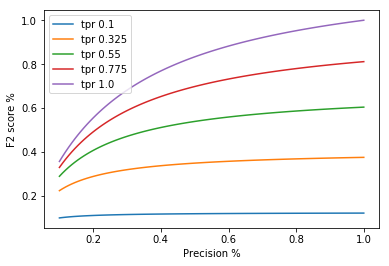

In [20]:
pre = np.linspace(0.1,1,100)
rec = np.linspace(0.1,1,5)

for r in rec:
    f = f2(pre,r)
    plt.plot(pre,f, label = 'tpr '+str(r))
plt.legend()
plt.xlabel("Precision %")
plt.ylabel("F2 score %")

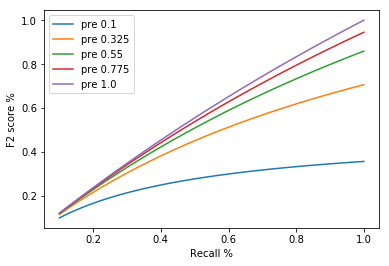

In [21]:
rec = np.linspace(0.1,1,100)
pre = np.linspace(0.1,1,5)

for p in pre:
    f = f2(p,rec)
    plt.plot(rec,f, label = 'pre '+str(p))
plt.legend()
plt.xlabel("Recall %")
plt.ylabel("F2 score %")